In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import graphviz

In [ ]:
data = pd.read_csv("gdrive/My Drive/Data/database.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


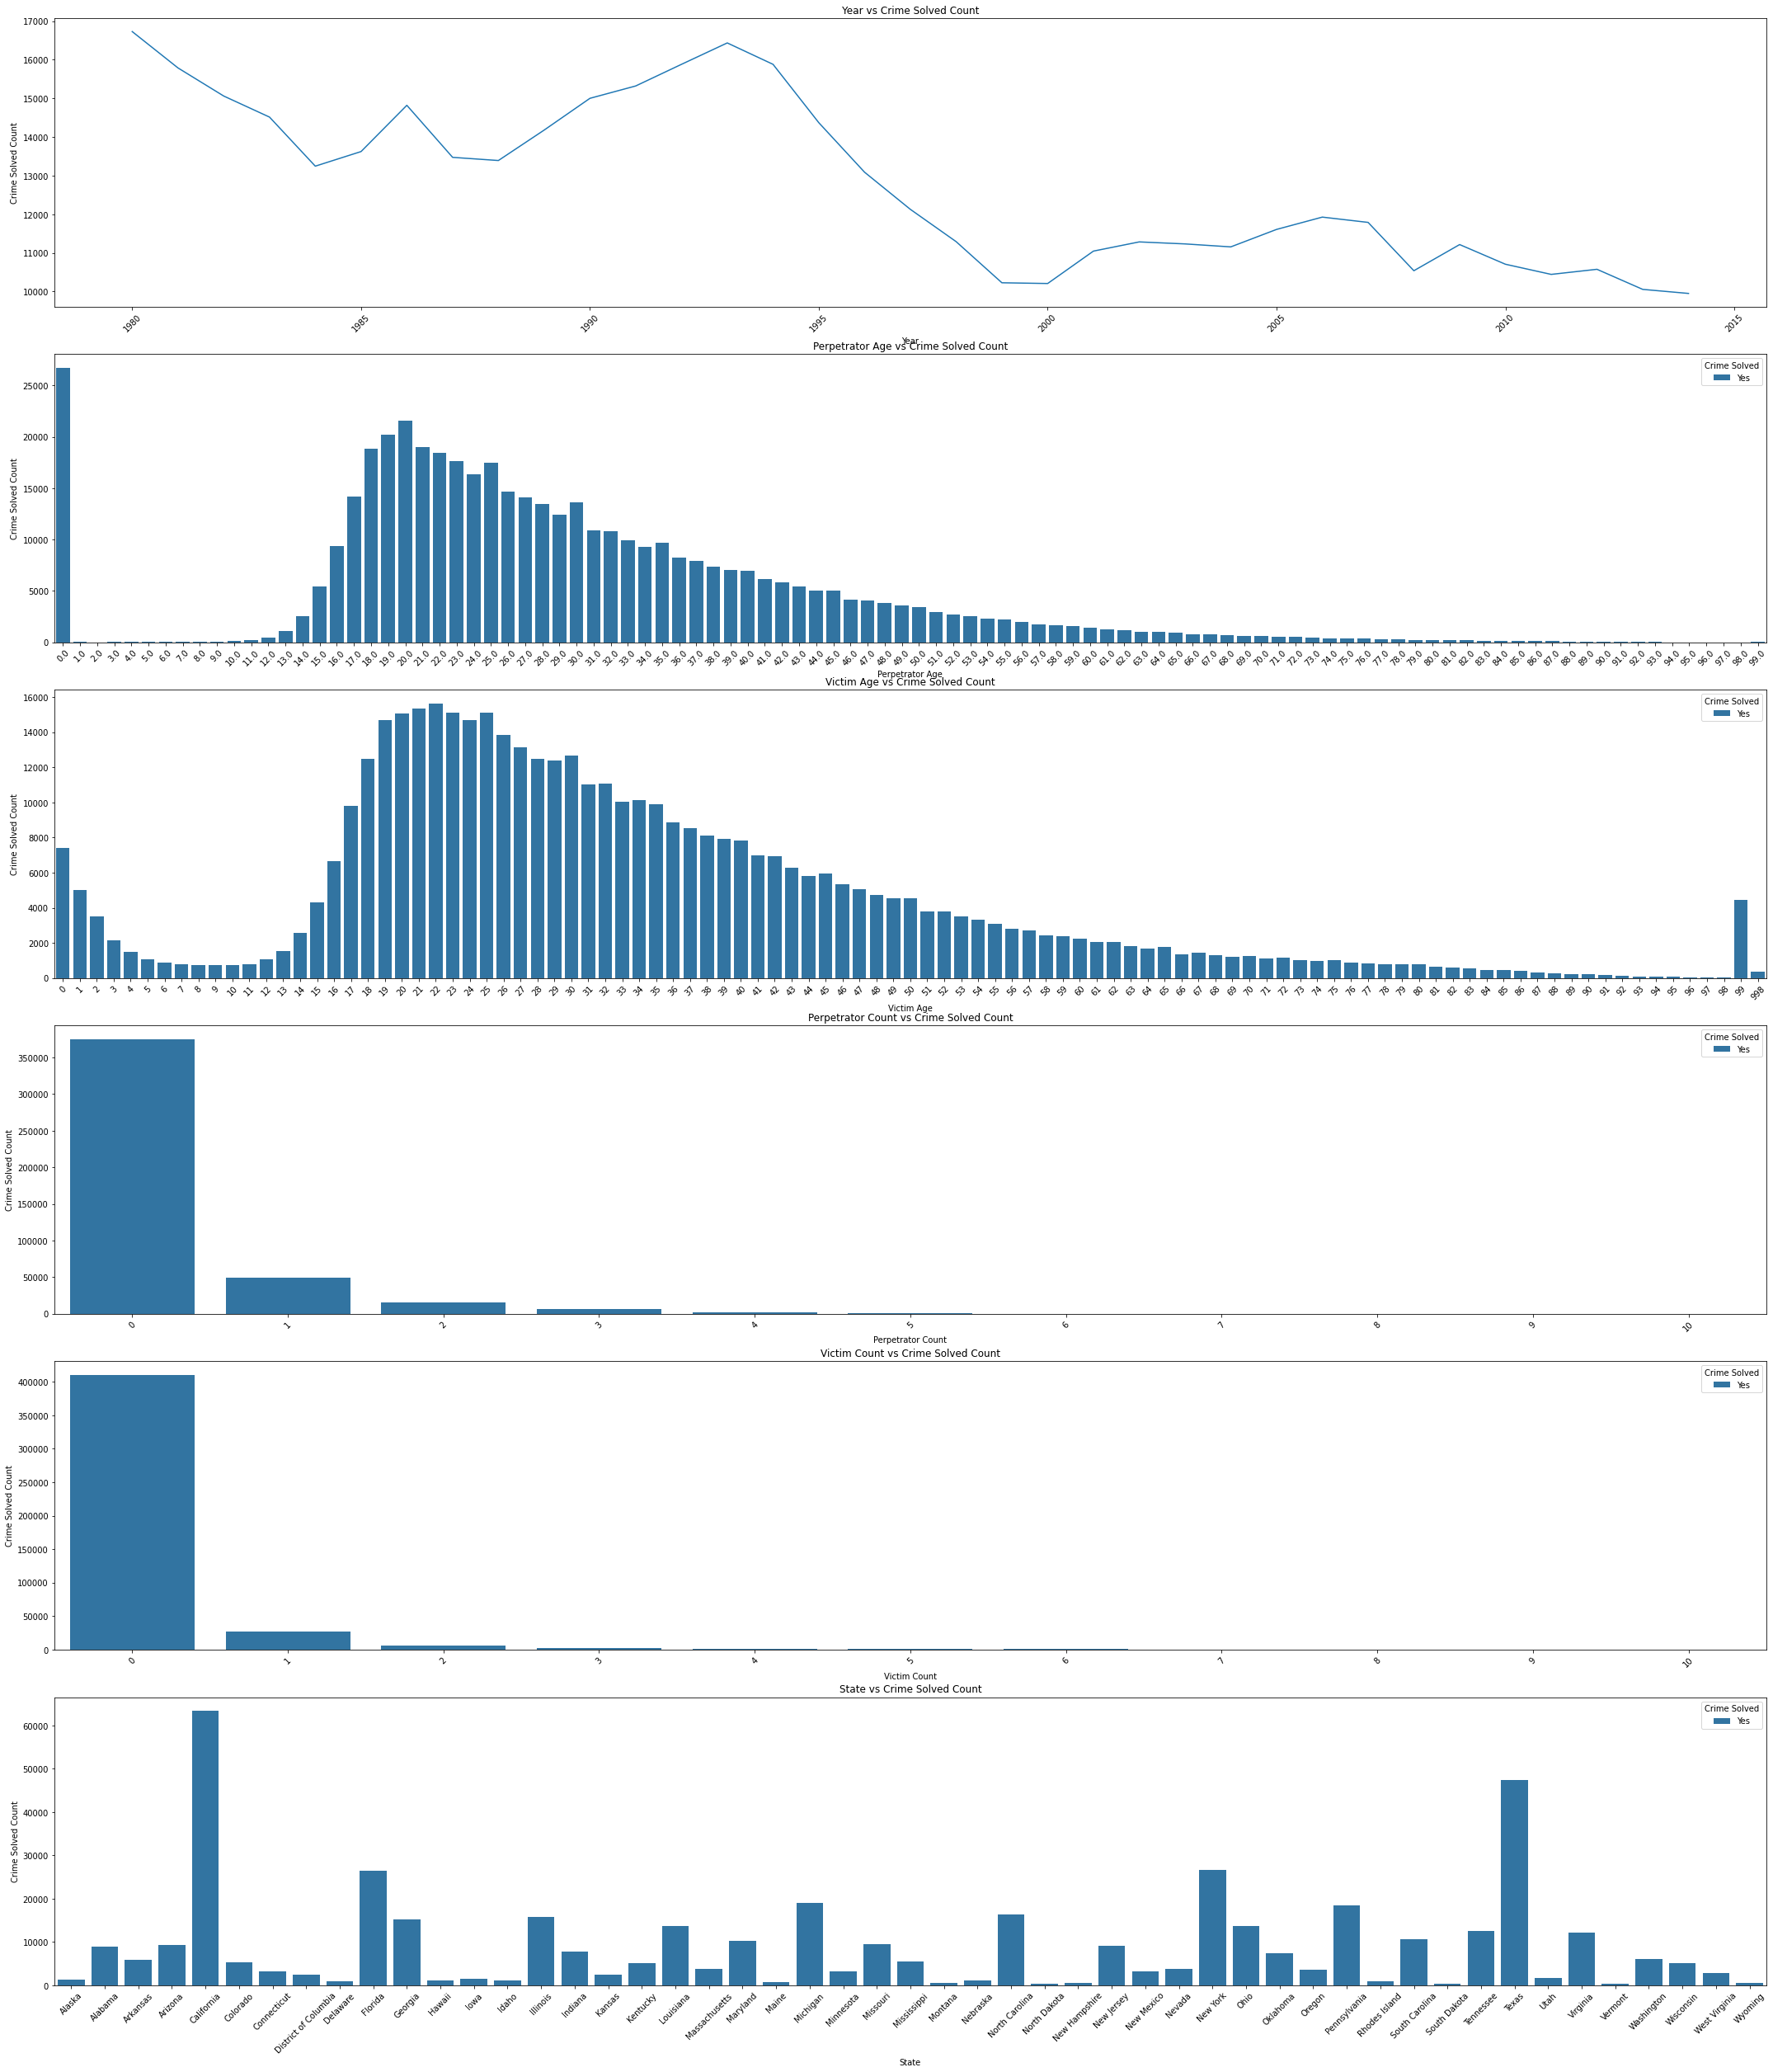

In [ ]:
fig, ax = plt.subplots(6,1,figsize=(30,35))
crime_year = sns.lineplot(data=data[data['Crime Solved']=='Yes'].groupby('Year').count().reset_index(),x='Year', y='Record ID',ax=ax[0])
ax[0].title.set_text('Year vs Crime Solved Count')
ax[0].set_ylabel('Crime Solved Count')


data['Perpetrator Age'] = data[data['Perpetrator Age']!=" "]['Perpetrator Age'].astype('int')
perpetrator_age = sns.countplot(data=data[data['Crime Solved']=="Yes"].sort_values(by=['Perpetrator Age']),x='Perpetrator Age', hue='Crime Solved', ax=ax[1])
plt.ylabel('Crime Solved Count')
plt.xlabel('Perpetrator Age')
ax[1].title.set_text('Perpetrator Age vs Crime Solved Count')
ax[1].set_ylabel('Crime Solved Count')

victim_age = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='Victim Age', hue='Crime Solved', ax=ax[2])
ax[2].set_ylabel('Crime Solved Count')
ax[2].title.set_text('Victim Age vs Crime Solved Count')


perpetrator_count = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='Perpetrator Count', hue='Crime Solved', ax=ax[3])
ax[3].set_ylabel('Crime Solved Count')
plt.xlabel('Perpetrator Count')
ax[3].title.set_text('Perpetrator Count vs Crime Solved Count')


victim_count = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='Victim Count', hue='Crime Solved',ax=ax[4])
ax[4].set_ylabel('Crime Solved Count')
plt.xlabel('Victim Count')
ax[4].title.set_text('Victim Count vs Crime Solved Count')

incident_plot = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='State', hue='Crime Solved',ax=ax[5])
ax[5].set_ylabel('Crime Solved Count')
plt.xlabel('State')
ax[5].title.set_text('State vs Crime Solved Count')
plt.xticks(rotation=45)
fig.tight_layout()
for a in ax:
    for tick in a.get_xticklabels():
        tick.set_rotation(45)


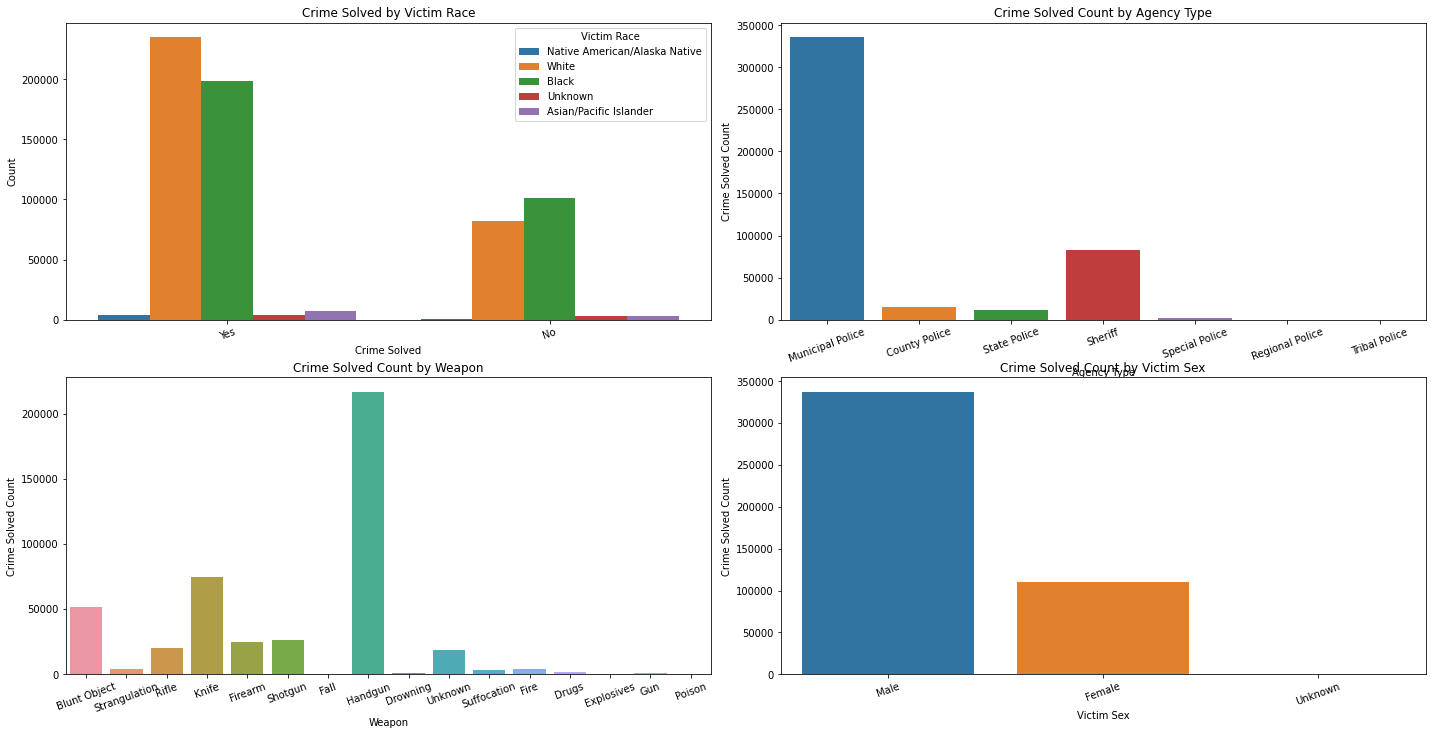

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
victim_race_plot = sns.countplot(data=data,x='Crime Solved', hue='Victim Race', ax=ax[0][0])
ax[0][0].title.set_text('Crime Solved by Victim Race')
ax[0][0].set_ylabel('Count')

agency_type_plot = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='Agency Type', ax=ax[0][1])
ax[0][1].title.set_text('Crime Solved Count by Agency Type')
ax[0][1].set_ylabel('Crime Solved Count')

weapon_type_plot = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='Weapon',ax=ax[1][0])
ax[1][0].title.set_text('Crime Solved Count by Weapon')
ax[1][0].set_ylabel('Crime Solved Count')

weapon_type_plot = sns.countplot(data=data[data['Crime Solved']=="Yes"],x='Victim Sex', ax=ax[1][1])
ax[1][1].title.set_text('Crime Solved Count by Victim Sex')
ax[1][1].set_ylabel('Crime Solved Count')
fig.tight_layout()

for a in ax:
  for p in a:
    for tick in p.get_xticklabels():
        tick.set_rotation(20)

In [ ]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


# Dataset Statistics

In [ ]:
print('Number of observations in dataset')
print(data.info())
print('Count of distinct values for categorical features')
numeric_features = ['Victim Age', 'Perpetrator Age', 'Victim Count', 'Perpetrator Count']
print(data[data.columns.difference(numeric_features)].nunique(dropna=True))
print('Statistics for Numeric features')
data[numeric_features].describe()



Number of observations in dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              638454 non-null  int64  
 1   Agency Code            638454 non-null  object 
 2   Agency Name            638454 non-null  object 
 3   Agency Type            638454 non-null  object 
 4   City                   638454 non-null  object 
 5   State                  638454 non-null  object 
 6   Year                   638454 non-null  int64  
 7   Month                  638454 non-null  object 
 8   Incident               638454 non-null  int64  
 9   Crime Type             638454 non-null  object 
 10  Crime Solved           638454 non-null  object 
 11  Victim Sex             638454 non-null  object 
 12  Victim Age             638454 non-null  int64  
 13  Victim Race            638454 non-null  object 
 14  Vi

,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638454.000000,638453.000000,638454.000000,638454.000000
mean,35.033512,20.322697,0.123334,0.185224
std,41.628306,17.886842,0.537733,0.585496
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000
50%,30.000000,21.000000,0.000000,0.000000
75%,42.000000,31.000000,0.000000,0.000000
max,998.000000,99.000000,10.000000,10.000000


## Missing Values

In [ ]:
data[data['Victim Age']>100]['Victim Age'].unique()
print('Percentage of obserations that list the age of the victim as 998: ', data[data['Victim Age']==998]['Victim Age'].count()/len(data['Victim Age'])*100, '%')
print('Percentage of obserations that list the age of the victim as 99: ', data[data['Victim Age']==99]['Victim Age'].count()/len(data['Victim Age'])*100, '%')

Percentage of obserations that list the age of the victim as 998:  0.15255601813129843 %
Percentage of obserations that list the age of the victim as 99:  1.4536677661977213 %


In [ ]:
for feature in data.columns.difference(['Record ID']):
  print('Percentage of unknown values for ', feature, 'is: ', data[data[feature]=='Unknown'][feature].count()/len(data[feature])*100, '%')

Percentage of unknown values for  Agency Code is:  0.0 %
Percentage of unknown values for  Agency Name is:  0.007361532702434319 %
Percentage of unknown values for  Agency Type is:  0.0 %
Percentage of unknown values for  City is:  0.0 %
Percentage of unknown values for  Crime Solved is:  0.0 %
Percentage of unknown values for  Crime Type is:  0.0 %
Percentage of unknown values for  Incident is:  0.0 %
Percentage of unknown values for  Month is:  0.0 %
Percentage of unknown values for  Perpetrator Age is:  0.0 %
Percentage of unknown values for  Perpetrator Count is:  0.0 %
Percentage of unknown values for  Perpetrator Ethnicity is:  69.92046412114263 %
Percentage of unknown values for  Perpetrator Race is:  30.70651918540725 %
Percentage of unknown values for  Perpetrator Sex is:  29.816556870189554 %
Percentage of unknown values for  Record Source is:  0.0 %
Percentage of unknown values for  Relationship is:  42.761577184887244 %
Percentage of unknown values for  State is:  0.0 %
Per

# Data Cleaning

In [ ]:
def clean_data(data):
  data = data[data['Victim Age']!=998]
  data = data[data['Victim Age']!=99]
  data = data[data.columns.difference(['Victim Ethnicity'])]
  for column in ['Victim Age', 'Victim Race', 'Victim Sex', 'Weapon', 'Agency Type', 'State', 'Month', 'Crime Solved']:
    data = data[data[column]!='Unknown']
  data['Victim Age'] = pd.cut(x=data['Victim Age'], bins=[-1,10,20,30,40,50,60,70,80,90,100])
  cleaned_data = data[['Victim Age', 'Victim Race', 'Victim Sex', 'Weapon', 'Agency Type', 'State', 'Month', 'Crime Solved']].reset_index(drop=True)
  return cleaned_data

In [ ]:
def one_hot_encode(hot_encoder_columns):
    ohe = OneHotEncoder(categories='auto')
    transformed = ohe.fit_transform(processed_data[hot_encoder_columns]).toarray()
    feature_labels = ohe.get_feature_names()
    ohe_transformed_matrix = pd.DataFrame(transformed, columns=feature_labels)
    return ohe_transformed_matrix
def label_encode(label_encoder_columns):
    le = LabelEncoder()
    transformed_binary = processed_data[label_encoder_columns].apply(le.fit_transform)
    transformed_binary_matrix = pd.DataFrame(transformed_binary)
    return transformed_binary_matrix

def process(subset):
    label_encoder_columns = [column for column in subset if column in ['Victim Sex', 'Crime Solved']]
    hot_encoder_columns = [column for column in subset if column not in ['Victim Sex', 'Crime Solved']]
    untransformed_columns = [column for column in subset if column not in label_encoder_columns and column not in hot_encoder_columns]
    encoded_dataset = label_encode(label_encoder_columns) 
    if hot_encoder_columns:
        one_hot_encoded_dataset = one_hot_encode(hot_encoder_columns)
        encoded_dataset = encoded_dataset.merge(one_hot_encoded_dataset, how='left', left_index=True, right_index=True)
    if untransformed_columns:
        encoded_dataset = processed_data[untransformed_columns].merge(encoded_dataset, left_index=True, right_index=True)
    
    return encoded_dataset

# **Supervised Machine Learning**

## Decision Tree

In [ ]:
# Get processed data 
processed_data = clean_data(data)
processed_data_dt = process(['Victim Age', 'Victim Race', 'Victim Sex', 'Weapon', 'Agency Type', 'State', 'Month', 'Crime Solved'])
X = processed_data_dt[processed_data_dt.columns.difference(['Crime Solved'])]
Y = processed_data_dt['Crime Solved']

# Find initial current depth
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier()
clf = decision_tree.fit(x_train, y_train)
y_pred = clf.predict(x_test)
current_depth = clf.tree_.max_depth
print('current depth', current_depth)
print(accuracy_score(y_pred,y_test))
possible_depths = [i for i in range(1,current_depth,10)]
possible_split_counts = [i for i in range(2,40,10)]
hyperparameters = dict(max_depth=possible_depths, min_samples_split=possible_split_counts)
decision_tree = DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, hyperparameters, cv=10)
best_model = classifier.fit(X,Y)
print('Best Max Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best Min Sample Split:', best_model.best_estimator_.get_params()['min_samples_split'])

current depth 83
0.6942517678429784
Best Max Depth: 11
Best Min Sample Split: 32


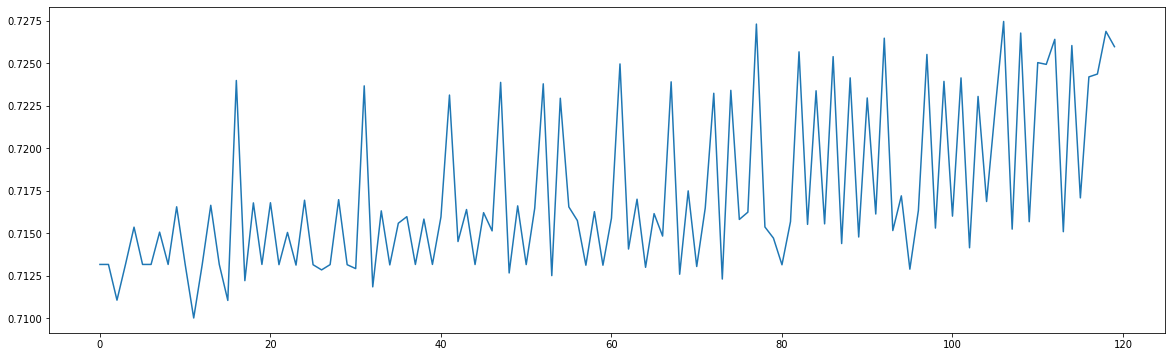

In [ ]:
features = ['Victim Age', 'Victim Race', 'Victim Sex', 'Weapon', 'Agency Type', 'State', 'Month']
subsets = []

# Generate unique subset of feature sets
for i in range(2, len(features)+1):  
  for list_of_possible_features in itertools.combinations(features, i):
    x = list(list_of_possible_features)
    x.append('Crime Solved')
    subsets.append(x)
final_scores = []
i = 0 

# Run classifier for each subset
for subset in subsets:
  dataset = process(subset)
  decision_tree = DecisionTreeClassifier(max_depth=11, min_samples_split=32)
  scores = cross_val_score(decision_tree,dataset[dataset.columns.difference(['Crime Solved'])],dataset['Crime Solved'], cv=10)
  final_scores.append(np.mean(scores))
  i+=1
subset_indeces = [i for i in range(0, len(final_scores))]
figure = plt.figure(figsize=(20,6))
line_plot = sns.lineplot(x =subset_indeces, y=final_scores)
plt.show()

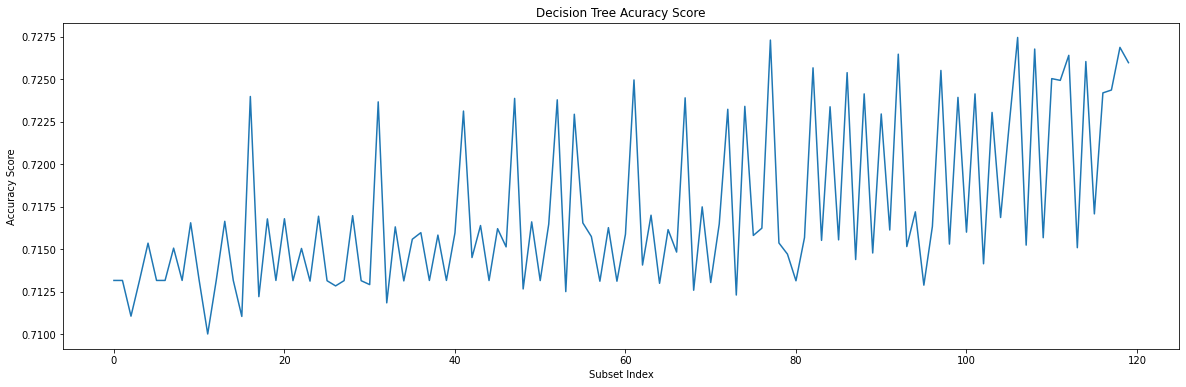

In [ ]:
figure = plt.figure(figsize=(20,6))
line_plot = sns.lineplot(x =subset_indeces, y=final_scores)
plt.xlabel('Subset Index')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Acuracy Score')
plt.show()

Average Accuracy score 0.7259719504079075


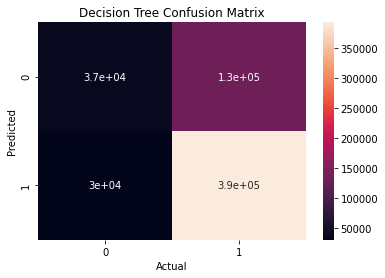

In [ ]:
#Process data with final set of features
processed_data_final = process(['Victim Race', 'Victim Sex', 'Weapon', 'State', 'Crime Solved'])

#Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=11, min_samples_split=32)
#Cross Validation
scores = cross_val_score(decision_tree,X,Y,cv=10)
average_score = np.mean(scores)

#Confusion Matrix
y_pred = cross_val_predict(decision_tree,X,Y,cv=10)
conf_matrix = confusion_matrix(Y, y_pred)
sns.heatmap(conf_matrix, annot=True)

#Print
print('Average Accuracy score', average_score)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:
dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)

##Logistic Regression

In [ ]:
# Declare data and variables
processed_data_lr = process(['Victim Race', 'Victim Sex', 'Weapon', 'State', 'Crime Solved'])
X = processed_data_lr[processed_data_lr.columns.difference(['Crime Solved'])]
Y = processed_data_lr['Crime Solved']

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=2000)
grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25]}
regression_classifier = GridSearchCV(logistic_regression, param_grid = grid_values,scoring = 'accuracy')
best_model = regression_classifier.fit(X,Y)
print('Best C value:', best_model.best_estimator_.get_params()['C'])

Best C value: 0.009


x ['Victim Race', 'Victim Sex']
x ['Victim Race', 'Weapon']
x ['Victim Race', 'State']
x ['Victim Sex', 'Weapon']
x ['Victim Sex', 'State']
x ['Weapon', 'State']
x ['Victim Race', 'Victim Sex', 'Weapon']
x ['Victim Race', 'Victim Sex', 'State']
x ['Victim Race', 'Weapon', 'State']
x ['Victim Sex', 'Weapon', 'State']
x ['Victim Race', 'Victim Sex', 'Weapon', 'State']
Total Subsets [['Victim Race', 'Victim Sex', 'Crime Solved'], ['Victim Race', 'Weapon', 'Crime Solved'], ['Victim Race', 'State', 'Crime Solved'], ['Victim Sex', 'Weapon', 'Crime Solved'], ['Victim Sex', 'State', 'Crime Solved'], ['Weapon', 'State', 'Crime Solved'], ['Victim Race', 'Victim Sex', 'Weapon', 'Crime Solved'], ['Victim Race', 'Victim Sex', 'State', 'Crime Solved'], ['Victim Race', 'Weapon', 'State', 'Crime Solved'], ['Victim Sex', 'Weapon', 'State', 'Crime Solved'], ['Victim Race', 'Victim Sex', 'Weapon', 'State', 'Crime Solved']]
subset ['Victim Race', 'Victim Sex', 'Crime Solved']
subset ['Victim Race', 'Weapo

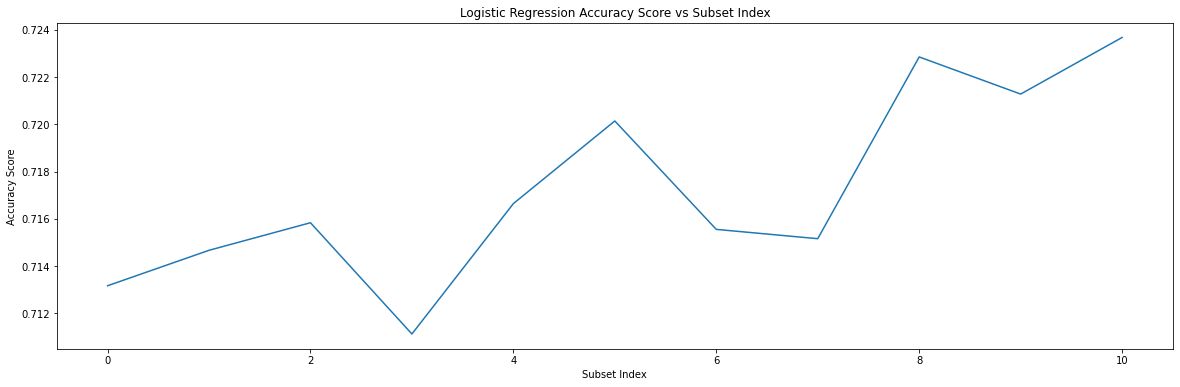

In [ ]:
processed_data = clean_data(data)
features = ['Victim Race', 'Victim Sex', 'Weapon', 'State']
subsets = []

# Generate unique subset of feature sets
for i in range(2, len(features)+1):  
  for list_of_possible_features in itertools.combinations(features, i):
    x = list(list_of_possible_features)
    x.append('Crime Solved')
    subsets.append(x)
final_scores = []
i = 0 

# Run classifier for each subset
for subset in subsets:
  dataset = process(subset)
  X = dataset[dataset.columns.difference(['Crime Solved'])]
  Y = dataset[['Crime Solved']].values.ravel()
  logistic_regression = LogisticRegression(max_iter=2000, C=0.009)
  scores = cross_val_score(logistic_regression,X,Y,cv=10)
  final_scores.append(np.average(scores))
  i+=1
subset_indeces = [i for i in range(0, len(final_scores))]
figure = plt.figure(figsize=(20,6))
line_plot = sns.lineplot(x =subset_indeces, y=final_scores)
plt.xlabel('Subset Index')
plt.ylabel('Accuracy Score')
plt.title('Logistic Regression Accuracy Score vs Subset Index')
plt.show()

Accuracy:  0.7236706054664404


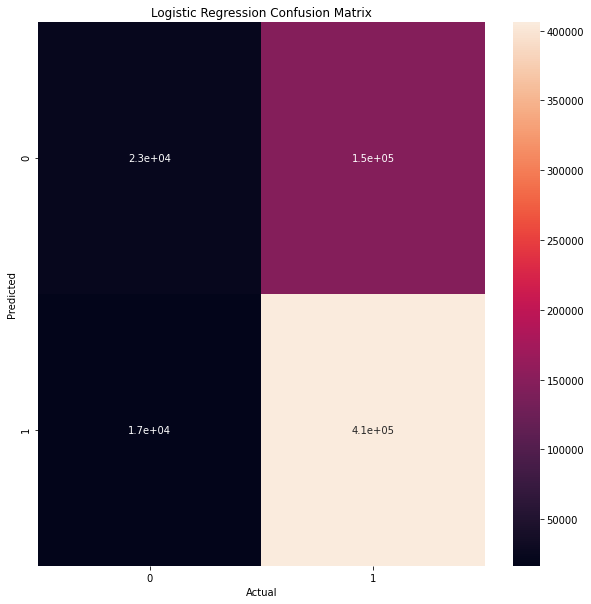

In [ ]:
# Declare data and variables
processed_data_lr = process(['Victim Race', 'Victim Sex', 'Weapon', 'State', 'Crime Solved'])
X = processed_data_lr[processed_data_lr.columns.difference(['Crime Solved'])]
Y = processed_data_lr['Crime Solved']

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=2000, C=0.009)

#Cross Validation
scores = cross_val_score(logistic_regression,X,Y,cv=10)
average_score = np.mean(scores)

#Confusion Matrix
y_pred = cross_val_predict(logistic_regression,X,Y,cv=10)
confus_matrix = confusion_matrix(Y, y_pred)
figure = plt.figure(figsize=(10,10))
heatmap_confusion_matrix = sns.heatmap(confus_matrix, annot=True)

#Print
print('Accuracy: ', average_score)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
#Default C Value
# Declare data and variables
processed_data_lr = process(['Victim Race', 'Victim Sex', 'Weapon', 'State', 'Crime Solved'])
X = processed_data_lr[processed_data_lr.columns.difference(['Crime Solved'])]
Y = processed_data_lr['Crime Solved']

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=2000, C=1)

#Cross Validation
scores = cross_val_score(logistic_regression,X,Y,cv=10)
average_score = np.mean(scores)

#Print
print('Accuracy: ', average_score)


Accuracy:  0.7233381062156574


# **Unsupervised Learning**

In [ ]:
processed_data = data[['Victim Race', 'Victim Sex', 'Weapon','State', 'Month', 'Crime Solved']].reset_index(drop=True)
processed_data['Crime Solved'].loc[(processed_data['Crime Solved']=='Yes')] = 'Crime Solved'
processed_data['Crime Solved'].loc[(processed_data['Crime Solved']=='No')] = 'Crime Not Solved'
matrix = processed_data.values
transaction_encoder = TransactionEncoder()
transaction_encoded_matrix = transaction_encoder.fit(matrix).transform(matrix)
encoded_df = pd.DataFrame(transaction_encoded_matrix, columns=transaction_encoder.columns_)

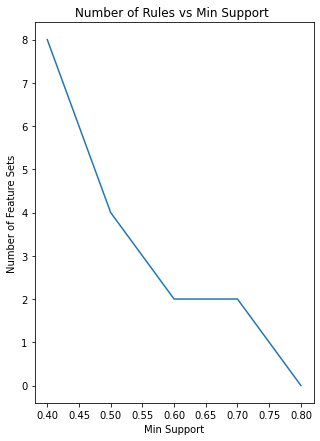

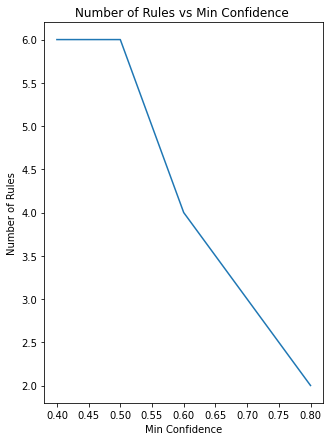

In [ ]:
possible_supports = [0.4,0.5, 0.6, 0.7, 0.8]
possible_confidence = [0.4,0.5, 0.6, 0.7, 0.8]
itemsets_lengths = []
rules_lengths = []

# Gener
for support in possible_supports:
    frequent_itemsets = apriori(encoded_df, min_support=support, use_colnames=True)
    itemsets_lengths.append(len(frequent_itemsets))
fig = plt.figure(figsize=(5,7))
lineplot_support = sns.lineplot(x=possible_supports, y=itemsets_lengths)
plt.ylabel('Number of Feature Sets')
plt.xlabel('Min Support')
plt.title('Number of Rules vs Min Support ')
plt.show()

frequent_itemsets = apriori(encoded_df, min_support=0.4, use_colnames=True)
for conf in possible_confidence:
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=conf)
    rules_lengths.append(len(rules))
    
fig = plt.figure(figsize=(5,7))
lineplot_confidence = sns.lineplot(x=possible_confidence, y=rules_lengths)
plt.ylabel('Number of Rules')
plt.xlabel('Min Confidence')
plt.title('Number of Rules vs Min Confidence ')
plt.show()

In [ ]:
frequent_itemsets = apriori(encoded_df, min_support=0.4, use_colnames=True)
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
print('rules', rules[['antecedents', 'consequents', 'support', 'confidence']])

    support              itemsets
0  0.480930               (Black)
1  0.713172        (Crime Solved)
2  0.526042             (Handgun)
3  0.783664                (Male)
4  0.496186               (White)
5  0.400911         (Black, Male)
6  0.541933  (Crime Solved, Male)
7  0.444663       (Handgun, Male)
rules       antecedents     consequents   support  confidence
0         (Black)          (Male)  0.400911    0.833616
1  (Crime Solved)          (Male)  0.541933    0.759890
2          (Male)  (Crime Solved)  0.541933    0.691537
3       (Handgun)          (Male)  0.444663    0.845299
